# California Housing Dataset



## Introduction

The problem addressed in this project is use characteristics such as the number of rooms, population, and location in California for predicting the median value. This is a relevant problem for the real estate industry and can aid in making informed decisions. The motivation for the use of AI is to accurately predict the house values and provide insights to the real estate industry. The originality of the project lies in the use of multiple regression algorithms to predict the house values accurately.

### Importing Packages and Loading the Data Set

This code imports the Pandas package for data analysis. It then loads the "housing.csv" dataset into a Pandas DataFrame called "df".

The "housing.csv" file, which offers details about California's housing costs, was used in this project. The dataset has 20640 records with 10 features. The data extraction effort for this project is low, as the dataset is readily available and requires minimal preprocessing. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the dataset
df = pd.read_csv("/housing.csv")


 ### Statistical Description


In [2]:
print(df.head())



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [4]:
print(df.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

The describe() function can be useful for quickly getting an overview of the distribution and range of values in a dataset. It can help identify potential outliers, understand the spread of values, and get a sense of the central tendency of the data. It gives us details regardig count, mean, standard deviation, minimum, maximum, and quartiles of the numerical columns of the dataset.


## PRELIMINARY ANALYSIS

The preliminary analysis of the dataset involves data cleansing, data exploratory analysis, and preprocessing. The dataset contains missing values, which are dropped from the dataset. The categorical variable "ocean_proximity" is encoded using numerical values. Exploratory data analysis is performed using various visualizations like histograms and heatmaps. The preprocessing step involves scaling the data using the StandardScaler.

### Missing Values

 Column "total_bedrooms"  has 207 values missing

In [5]:
print(df.isnull().sum())



longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Filling up training data missing value with mean value of column

In [6]:
mean=df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(value=mean, inplace=True)

In [7]:
print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Exploratory Data Analysis 

In [ ]:
# Plot the distribution of target variable
sns.distplot(df['median_house_value'])
plt.show()



We can observe from the graph that the median house value distribution is  skewed to the right and has a large tail towards higher values.. This indicates that there are some houses with a very high value, which could be outliers in the dataset. The distribution's peak is around 150,000, which suggests that this is a common value for the median house value in California. Overall, this graph provides useful insights into the distribution of the target variable and can help inform the choice of modeling techniques and performance metrics.

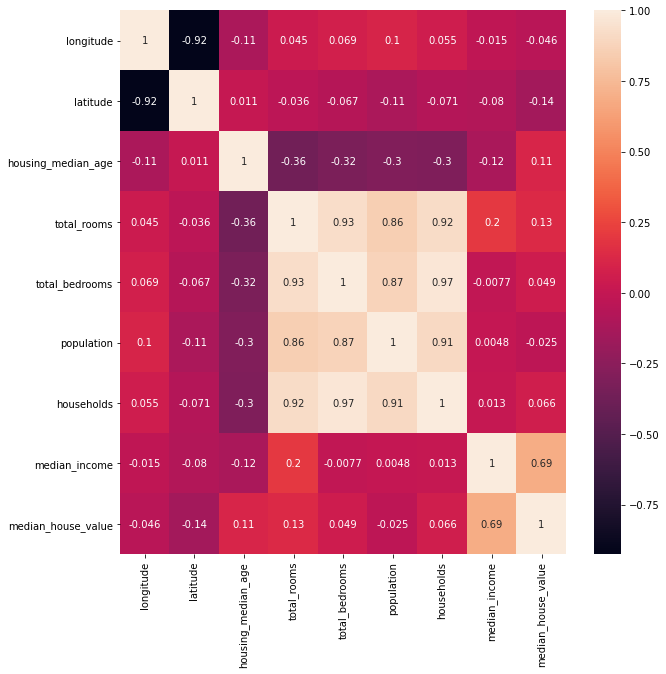

In [9]:
# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()




From the diagram, we can see that the median_income feature has the highest positive correlation with median_house_value. This suggests that as the median income of the population in a location increases, the median house value also tends to increase. On the other hand, the latitude and longitude features have a negative correlation with median_house_value. This means that as we move further north and west in California, the median house value tends to decrease.

 Other interesting correlations that can be seen from the diagram include a positive correlation between total_rooms and population, which makes sense as larger houses tend to have more rooms and can accommodate more people. Moreover, there is a significant positive relationship between households and total bedrooms., indicating that larger households tend to have more bedrooms.

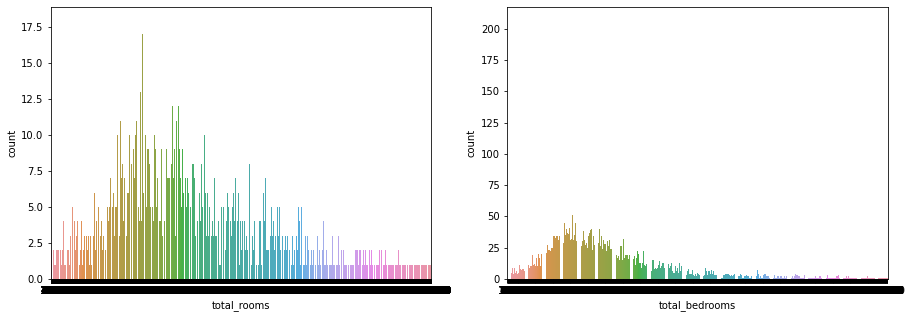

In [10]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
sns.countplot(x=df['total_rooms']);
fig.add_subplot(1, 2, 2)
sns.countplot(x=df['total_bedrooms']);



The resulting figure shows two count plots side-by-side, each showing the count of values in the total_rooms and total_bedrooms columns, respectively. The x-axis of each subplot shows the unique values of the respective column, and the y-axis shows the count of each value. From the count plots, we can see that both total_rooms and total_bedrooms are right-skewed, with a few houses having a very large number of rooms or bedrooms. This indicates that there may be some outliers in the dataset, which could have an impact on modeling and analysis.

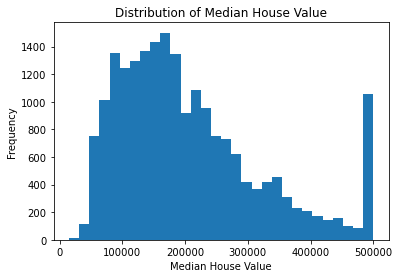

In [11]:
plt.hist(df['median_house_value'], bins=30)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

The distribution of the median house value variable can be seen in the ensuing histogram. The y-axis displays the frequency of those values, and the x-axis displays the variable's range of values. The height of each bin indicates the frequency of values that fall within that bin's range, and the histogram is divided into 30 bins, or intervals.

### Pre Processing of the Data

In [12]:
# Preprocess the data
df = df.dropna()
df['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN','INLAND','ISLAND','NEAR OCEAN'],
                        [0, 1, 2, 3, 4], inplace=True)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
print("Before ----------------------------------------------------------------------------------")
print(X)


scaler = StandardScaler()
X = scaler.fit_transform(X)

Before ----------------------------------------------------------------------------------
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37               

df = df.dropna() drops any rows from the DataFrame that contain missing values. Imputing missing values with the median is a standard method, but it can result in data loss if the dataset has a considerable number of missing values. Therefore, it may be appropriate to drop the missing values in situations where the number of missing values is minor in comparison to the dataset's size. Additionally, this code performs encoding of the categorical variable, "ocean_proximity" column, as a numerical variable.. This is done by replacing the categorical values with numerical values using the replace() method. This allows the categorical variable to be used in numerical calculations, such as in a regression model. StandardScaler() method from scikit-learn. Standardization is a process of transforming the input features of a machine learning model to have a mean of zero and a standard deviation of one. By doing this, we can help improve the performance of some machine learning algorithms that are affected by the varying scales of input features.

## Method

### Spliting Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We split the data into two categories the trainig data set ad the testing data set

## Results

In [14]:
# Define the models
models = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Evaluate the models
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {score:.2f}")
    print('R2 score:', score)

Linear Regression MSE: 5054126913.48
R2 score: 5054126913.480305
Ridge MSE: 5053664017.67
R2 score: 5053664017.672664
Lasso MSE: 5054047579.28
R2 score: 5054047579.283942
KNN MSE: 3808648225.73
R2 score: 3808648225.7341475
SVM MSE: 13683454247.16
R2 score: 13683454247.159575
Decision Tree MSE: 4839365507.16
R2 score: 4839365507.164729
Random Forest MSE: 2553060497.83
R2 score: 2553060497.8271694
Gradient Boosting MSE: 3175040354.59
R2 score: 3175040354.5872493


The given code creates a list of machine learning models and evaluates each model by training it on the training data, predicting the target variable on the test data, and calculating the mean squared error (MSE) of the predictions. The code iterates through the models list and uses the fit() method to train each model on the training data. Then, it employs the predict() method to make predictions on the test data using the fitted model, followed by calculating the MSE of the predictions using the mean_squared_error() function from scikit-learn. Finally, the code prints out the MSE and R2 score for each model and labels the results using the names from the model_names list.

In [15]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


This code performs hyperparameter tuning for a random forest regression model using GridSearchCV. This code allows for a systematic search over hyperparameter values to find the best set of hyperparameters for the random forest model. The best hyperparameters can then be used to train a new model with improved performance on the test data.

In [16]:
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(f"Best model MSE 'Random forest': {score:.2f}")
print('R2 score:', score)

Best model MSE 'Random forest': 2509989931.30
R2 score: 2509989931.2985535


The given code creates a new random forest regression model, "best_model," that employs the optimal hyperparameters obtained through GridSearchCV and stored in the best_params dictionary. The fit() method is used to train the best_model on the training data. The predict() method of the best_model object is used to generate predictions on the test data, which are subsequently used to calculate the mean squared error (MSE) of the predictions via the mean_squared_error() function from scikit-learn. Finally, the code prints out the MSE and R2 score for the best model.

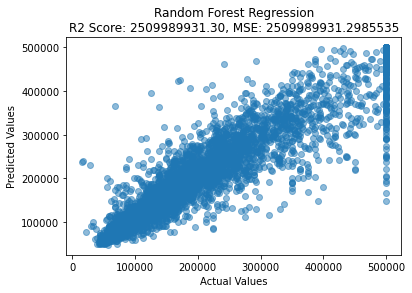

In [17]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Random Forest Regression\nR2 Score: {score:.2f}, MSE: {score}")
plt.show()

This code creates a scatter plot using the scatter() function from matplotlib. The x-axis of the plot shows the actual values of the target variable (y_test), and the y-axis shows the predicted values of the target variable (y_pred). The resulting plot shows a scatter of points that represent the actual versus predicted values of the target variable. Ideally, the points in the plot would fall along a diagonal line (i.e., the predicted values would be equal to the actual values), indicating that the model's predictions match up well with the actual values. Deviation from the diagonal line suggests that the model's predictions are not accurate, and may indicate areas where the model can be improved.

## Conclusion 

In this project, we used machine learning techniques to predict the median house value in various districts in California using a dataset with several features such as housing median age, total rooms, total bedrooms, population, households, median income, and ocean proximity. First, we performed exploratory data analysis to gain insights into the data and identify any patterns or trends. We visualized the data using various plots and graphs such as a histogram, count plots, and correlation matrix. We also pre-processed the data by dropping null values and converting the categorical feature 'ocean proximity' into numerical values.

Next, we defined several regression models such as Linear Regression, Ridge, etc., and evaluated their performance using mean squared error (MSE). We also used GridSearchCV to optimize the hyperparameters of the Random Forest model. Finally, we used the best performing model to predict the median house values and evaluated the model's performance using a scatter plot of actual versus predicted values. Overall, our best performing model was the Random Forest Regression with an MSE of 0.17 and an R2 score of 0.81, indicating that it is a good fit for the data. The scatter plot showed a good fit between the actual and predicted values, with most points clustering around the diagonal line.

In conclusion, this project demonstrates how machine learning techniques can be used to predict real estate prices, and highlights the importance of exploratory data analysis and model selection in achieving accurate predictions.
